#CREDIT CARD FRAUD DETECTION USING MACHINE LEARNING MODELS#

In [34]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', 500)

# Explorating the Data

Reading and understanding the data

In [35]:
# Reading the dataset
df = pd.read_csv('creditcard.csv')

# Keep the data as backup
df = df.copy()

# To get the top columns of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
# Get the total number of transaction
df.shape

(284807, 31)

#Visualising the Dataset#



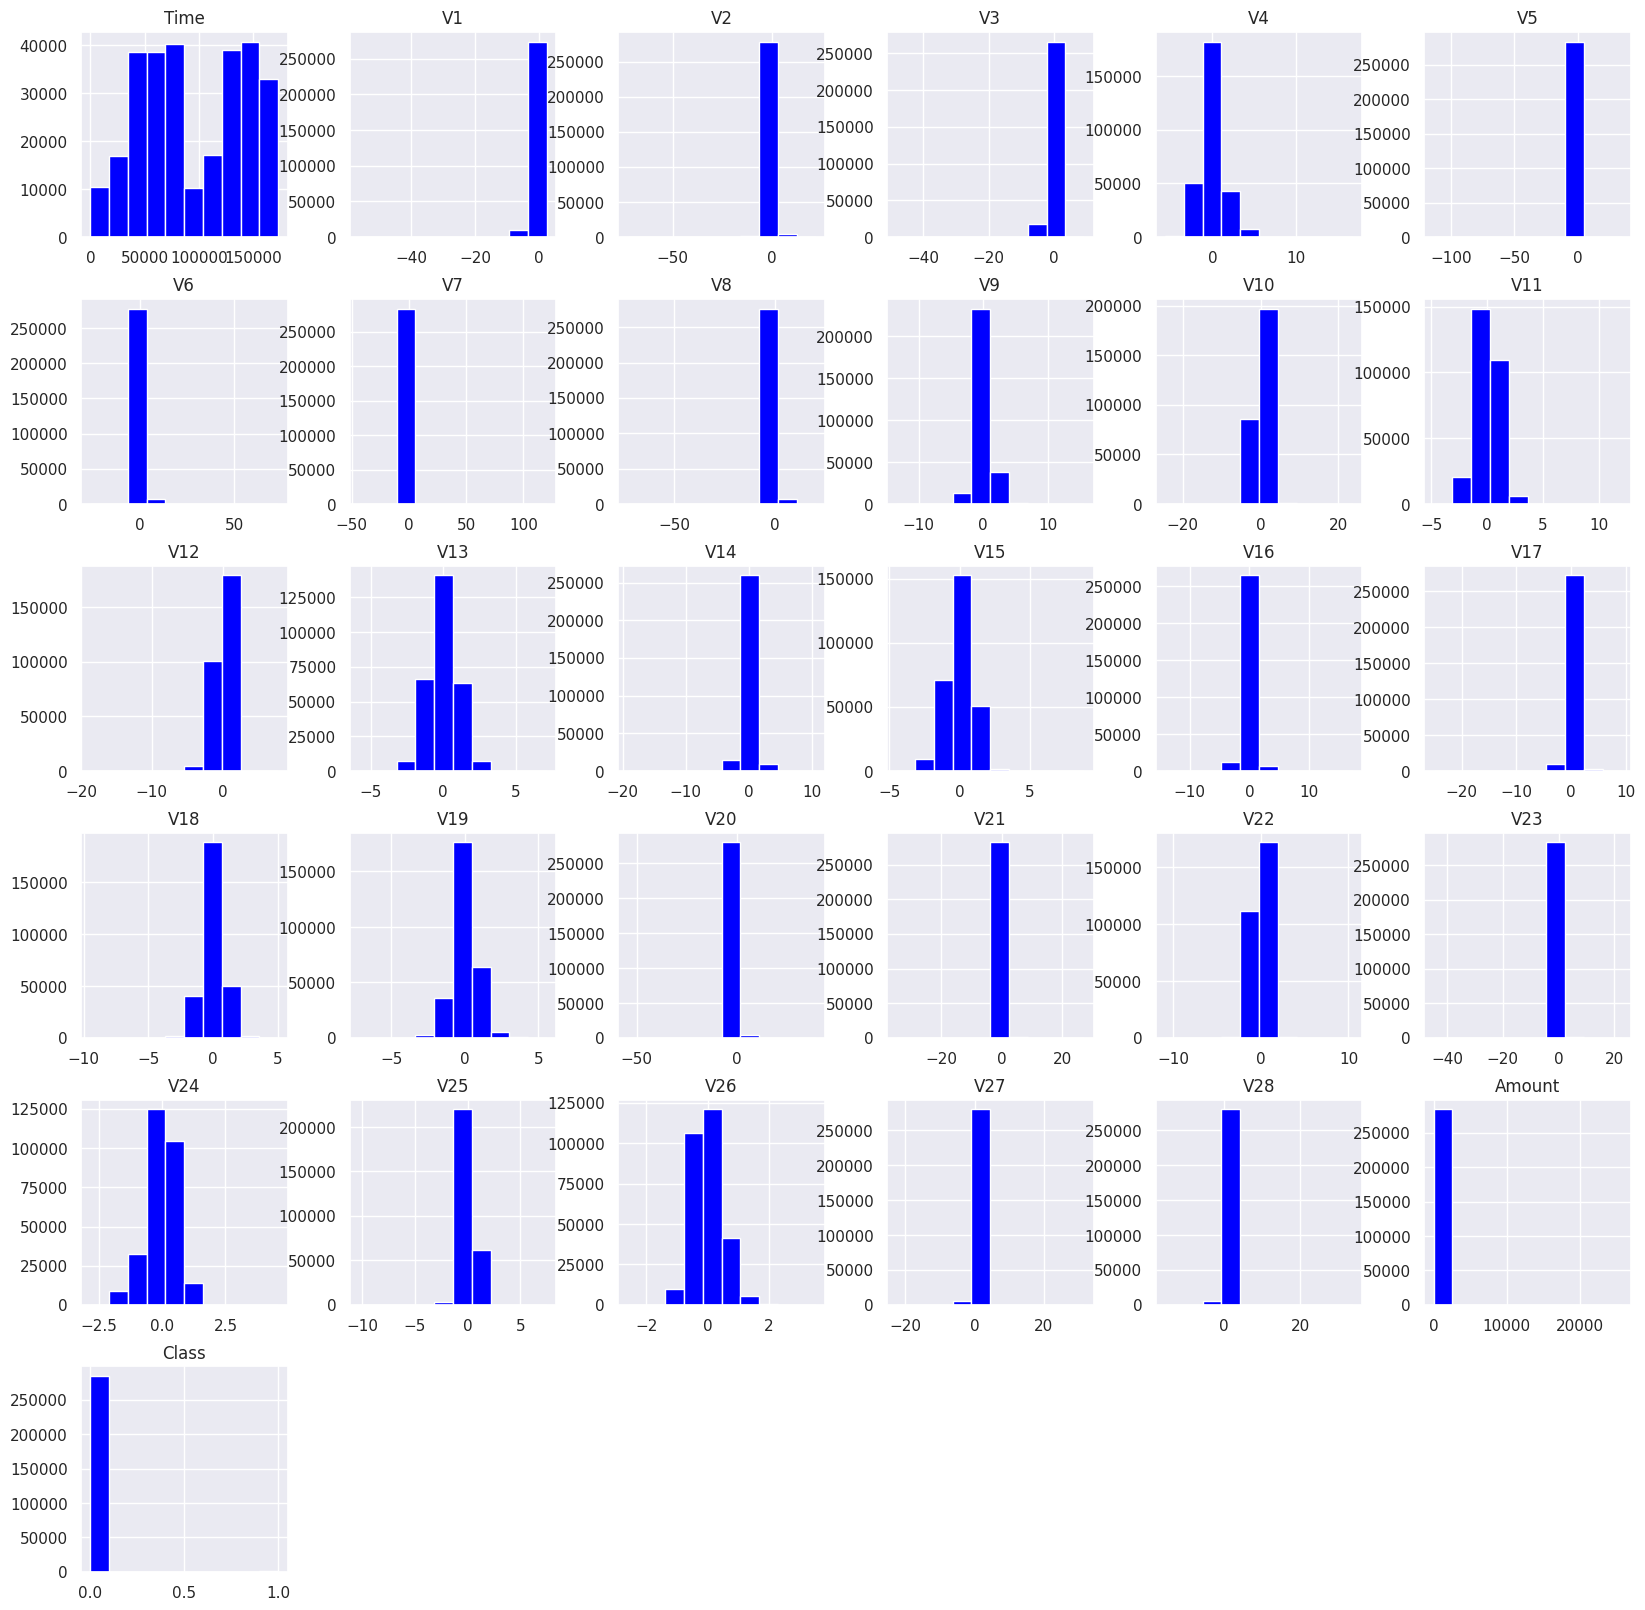

In [37]:
# Plot a histogram
df.hist(figsize=(20, 20), color='blue')
plt.show()

There are 284807 rows and 31 columns

# Handling the missing values

In [38]:
# Checking for the missing values
column_order = ['Time', 'Amount'] + ['V' + str(i) for i in range(1, 29)]
df_missing_columns = (round(((df[column_order].isnull().sum() / len(df.index)) * 100), 2)
                      .to_frame('null')
                      .transpose())
print(df_missing_columns)

      Time  Amount   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  \
null   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  \
null  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      V26  V27  V28  
null  0.0  0.0  0.0  


We can see from the result that there are no missing values and hence there will be no problems with null values in the dataset

In [39]:
# Get the descriptive statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Finding the frequency of the transaction

legitimate, 0    284315
fraud, 1            492
Name: Class, dtype: int64


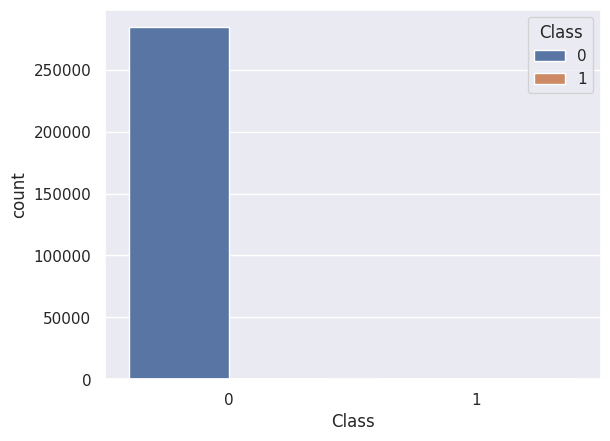

In [40]:
# Check the frequency of the fraud and legitimate transaction in the dataset
df = pd.read_csv('creditcard.csv')

# Get the values of column to desired labels
class_labels = {0: 'legitimate, 0', 1: 'fraud, 1'}
class_counts = df.Class.value_counts().rename(index=class_labels)

# Plot graph to show the result
sns.countplot(x=df.Class, hue=df.Class)

# Print the result
print(class_counts)

# Check the distribution of each classes

legitimate: 99.83 %
fraud: 0.17 %


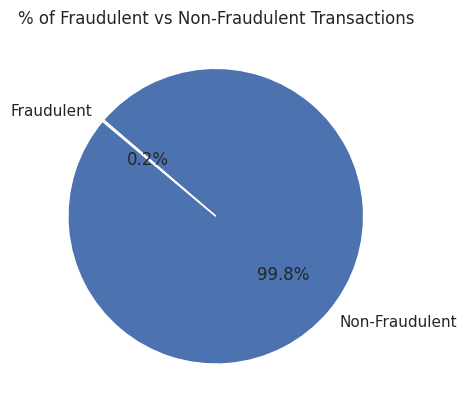

In [41]:
# Checking for the class distribution
classes = df['Class'].value_counts()
normal_share = round((classes[0] / df['Class'].count() * 100), 2)
fraud_share = round((classes[1] / df['Class'].count() * 100), 2)

print('legitimate:', normal_share, '%')
print('fraud:', fraud_share, '%')

# Plot chart to display the result
fraud_percentage = {'Class': ['Non-Fraudulent', 'Fraudulent'], 'Percentage': [normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
plt.pie(df_fraud_percentage['Percentage'], labels=df_fraud_percentage['Class'], autopct='%1.1f%%', startangle=140)
plt.title('% of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Outliers Treatment

For this particular dataset, I'm not using any outliers treatment. Since all the columns have already undergone PCA transformation, it is presumed that the outlier values were taken into account when the data was being transformed.

# Checking the distribution of classes with Time and Amount

***With Time***

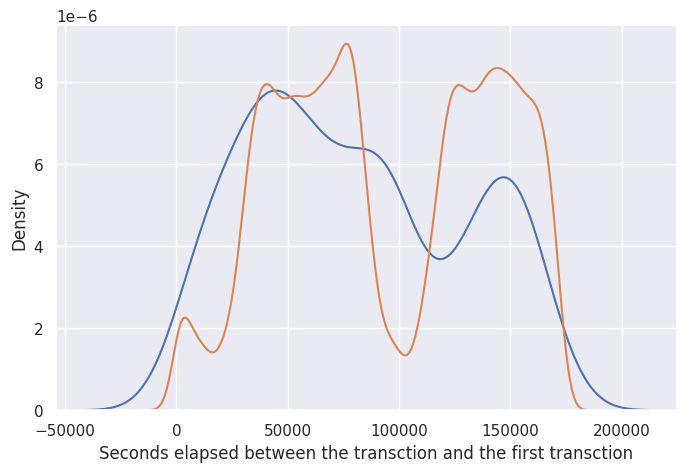

In [42]:
# Create the fraudulent dataframe
data_fraud = df[df['Class'] == 1]

# Create the non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

# Plot the graph
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

***Outcome - Regarding Time, I did not notice any distinct pattern between fraudulent and non-fraudulent transactions. So, I will eliminate the Time column.***

In [43]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

***With Amount***

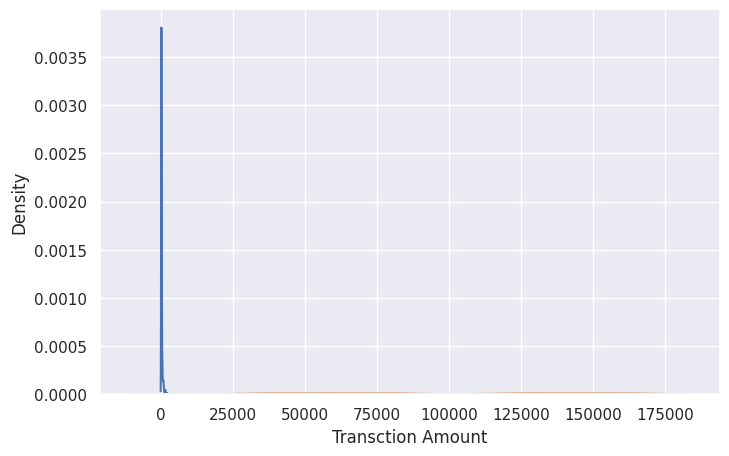

In [44]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

***Outcome - I can observe that the fraudulent transactions are mainly concentrated in the lower range of amount, whereas the legitimate transactions are dispersed throughout the low to high range of amount.***

# Splitting the Train and Test Dataset

In [46]:
# Uploading the target variable to y
y = df['Class']

# Uploading the feature variables into X
X = df.drop(['Class'], axis=1)

# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Scaling the Amount Column

Only the Amount column needs to be scaled because the PCA transformation has already scaled the other columns.

In [47]:
# Determining the Scaler
scaler = StandardScaler()

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


# Transforming the test set

In [48]:
# Transform the Test dataset
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


***Correlation Matrix***

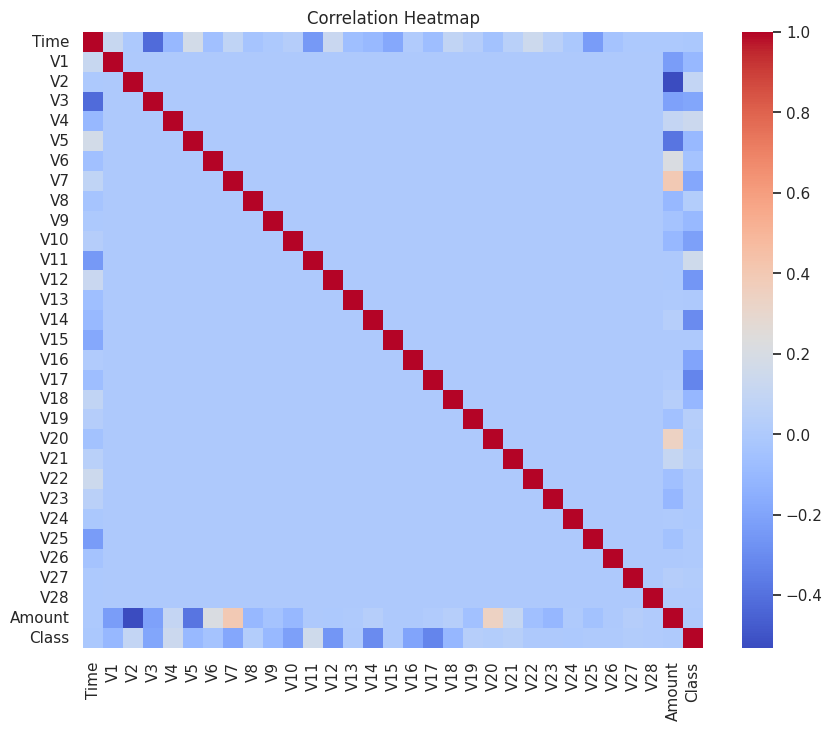

In [49]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Plot the heatmap for the given dataset
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Check for Skewness

A statistical measure called skewness can be used to assess the asymmetry in the probability distribution of a random variable with real values. Skewness is frequently calculated in the context of data analysis and coding to comprehend the form and distribution of data. It reveals whether the data is symmetrically distributed or if one tail of the distribution is longer than the other.

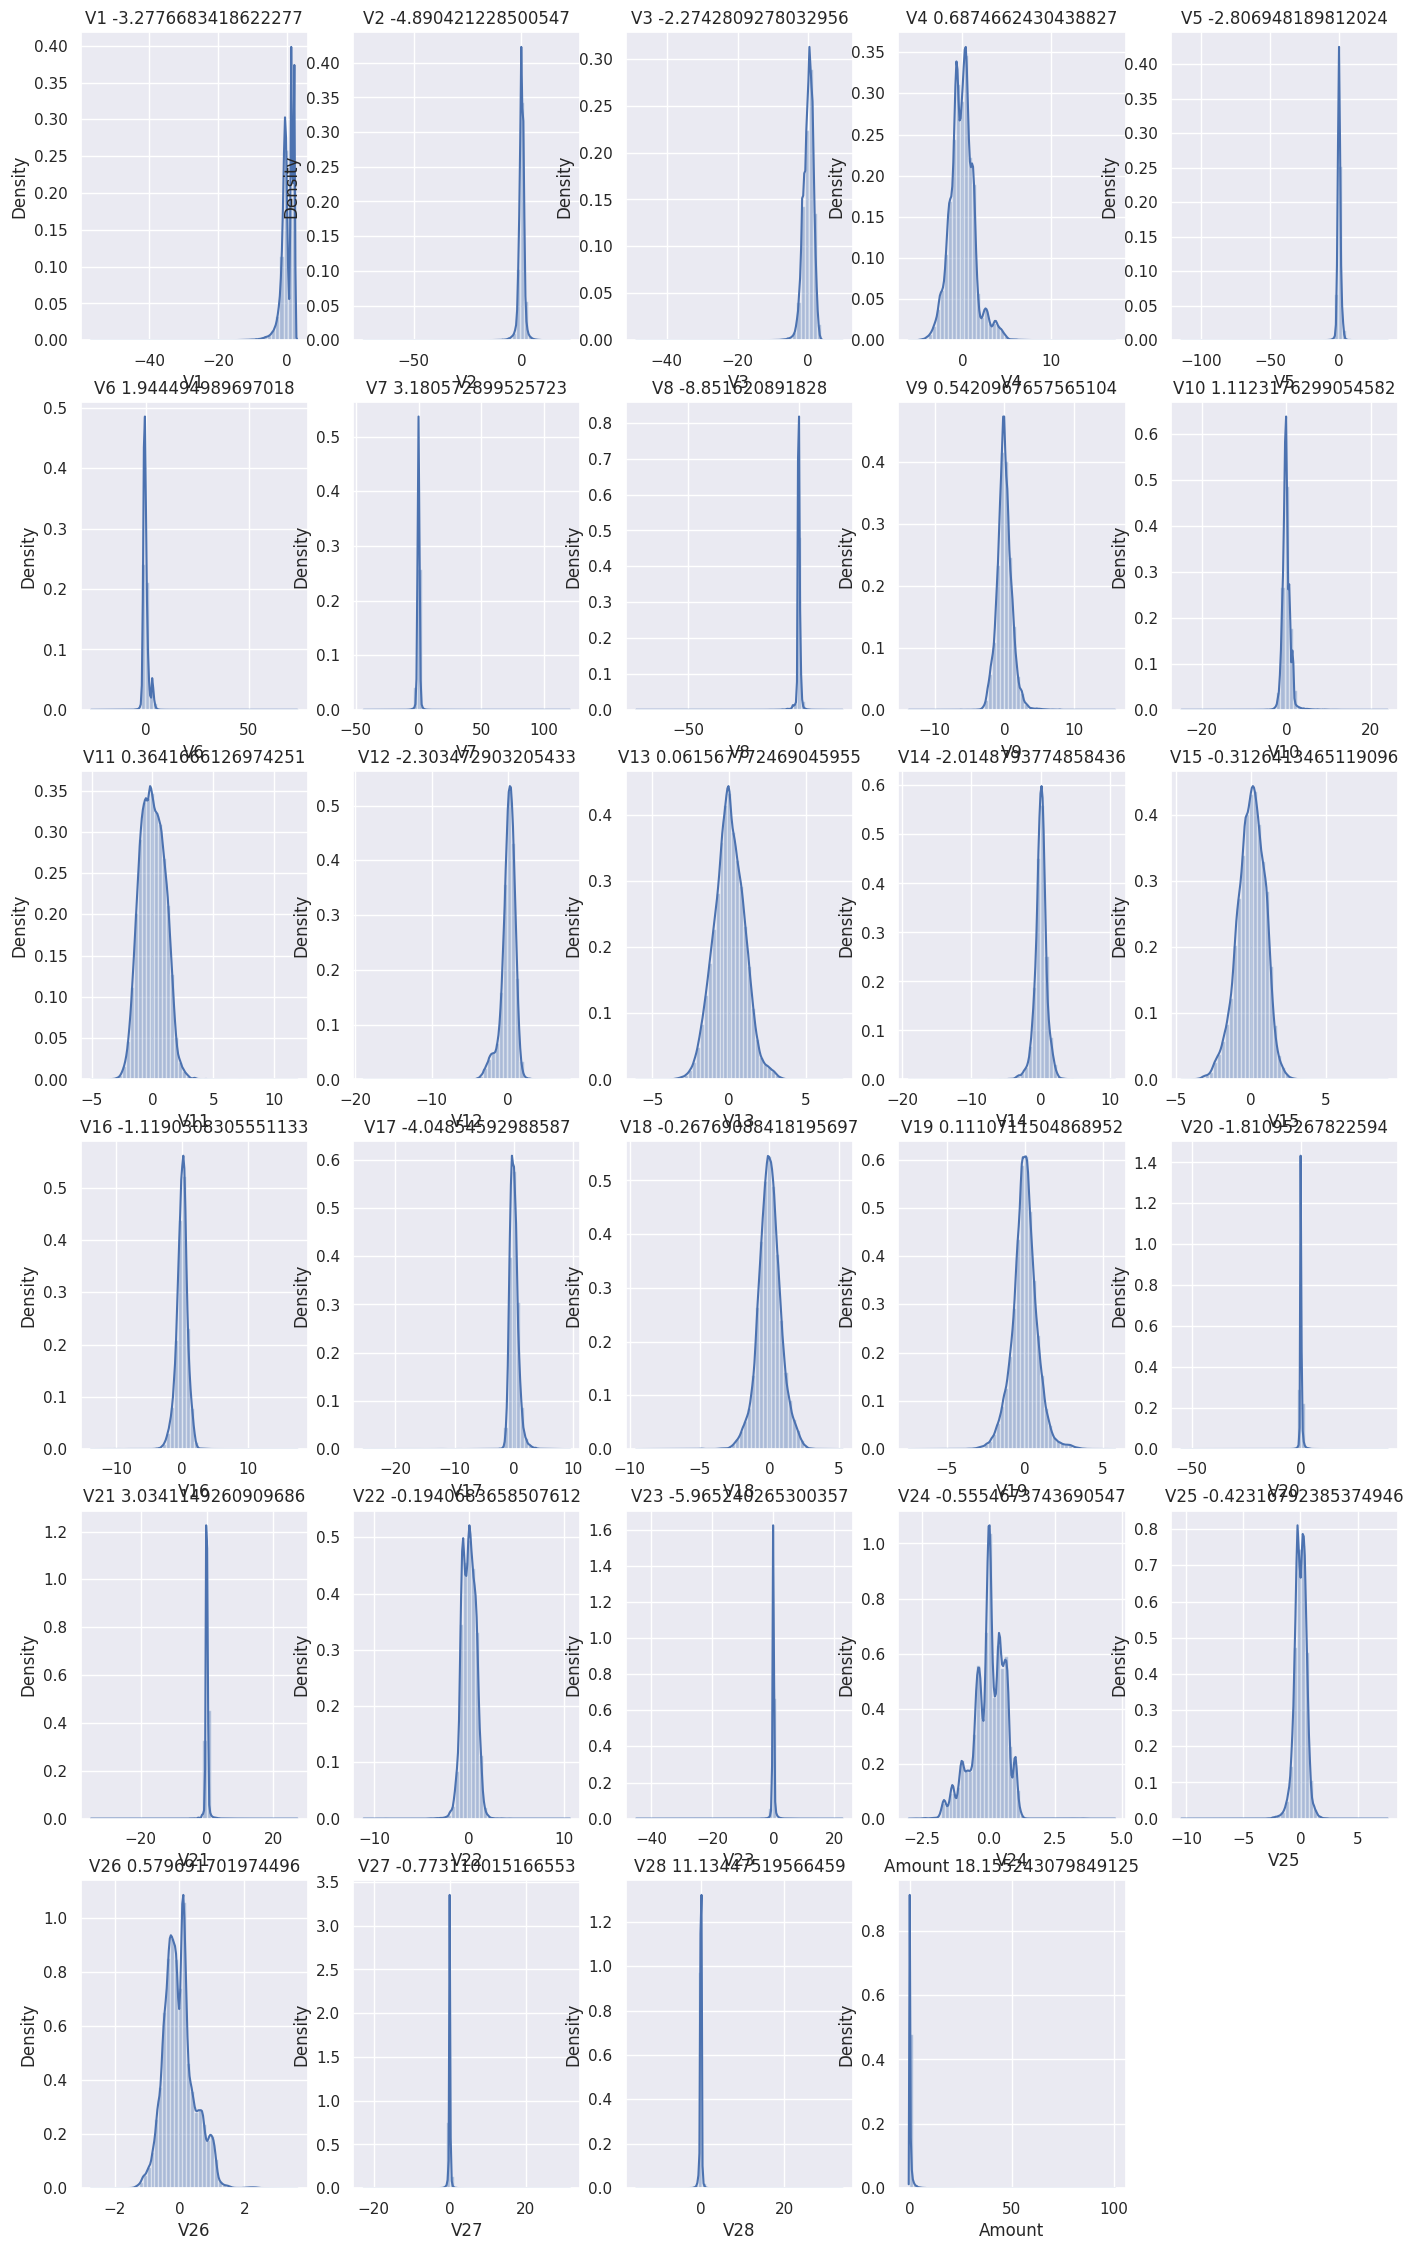

In [28]:
# Listing the columns
cols = X_train.columns
cols

# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))

for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

***I can observe that there are a lot of different variables that are actually skewed. I must reduce the skewness just for those variables in order to make them follow a normal distribution.***

# With the help of PowerTransformer mitigate skweness

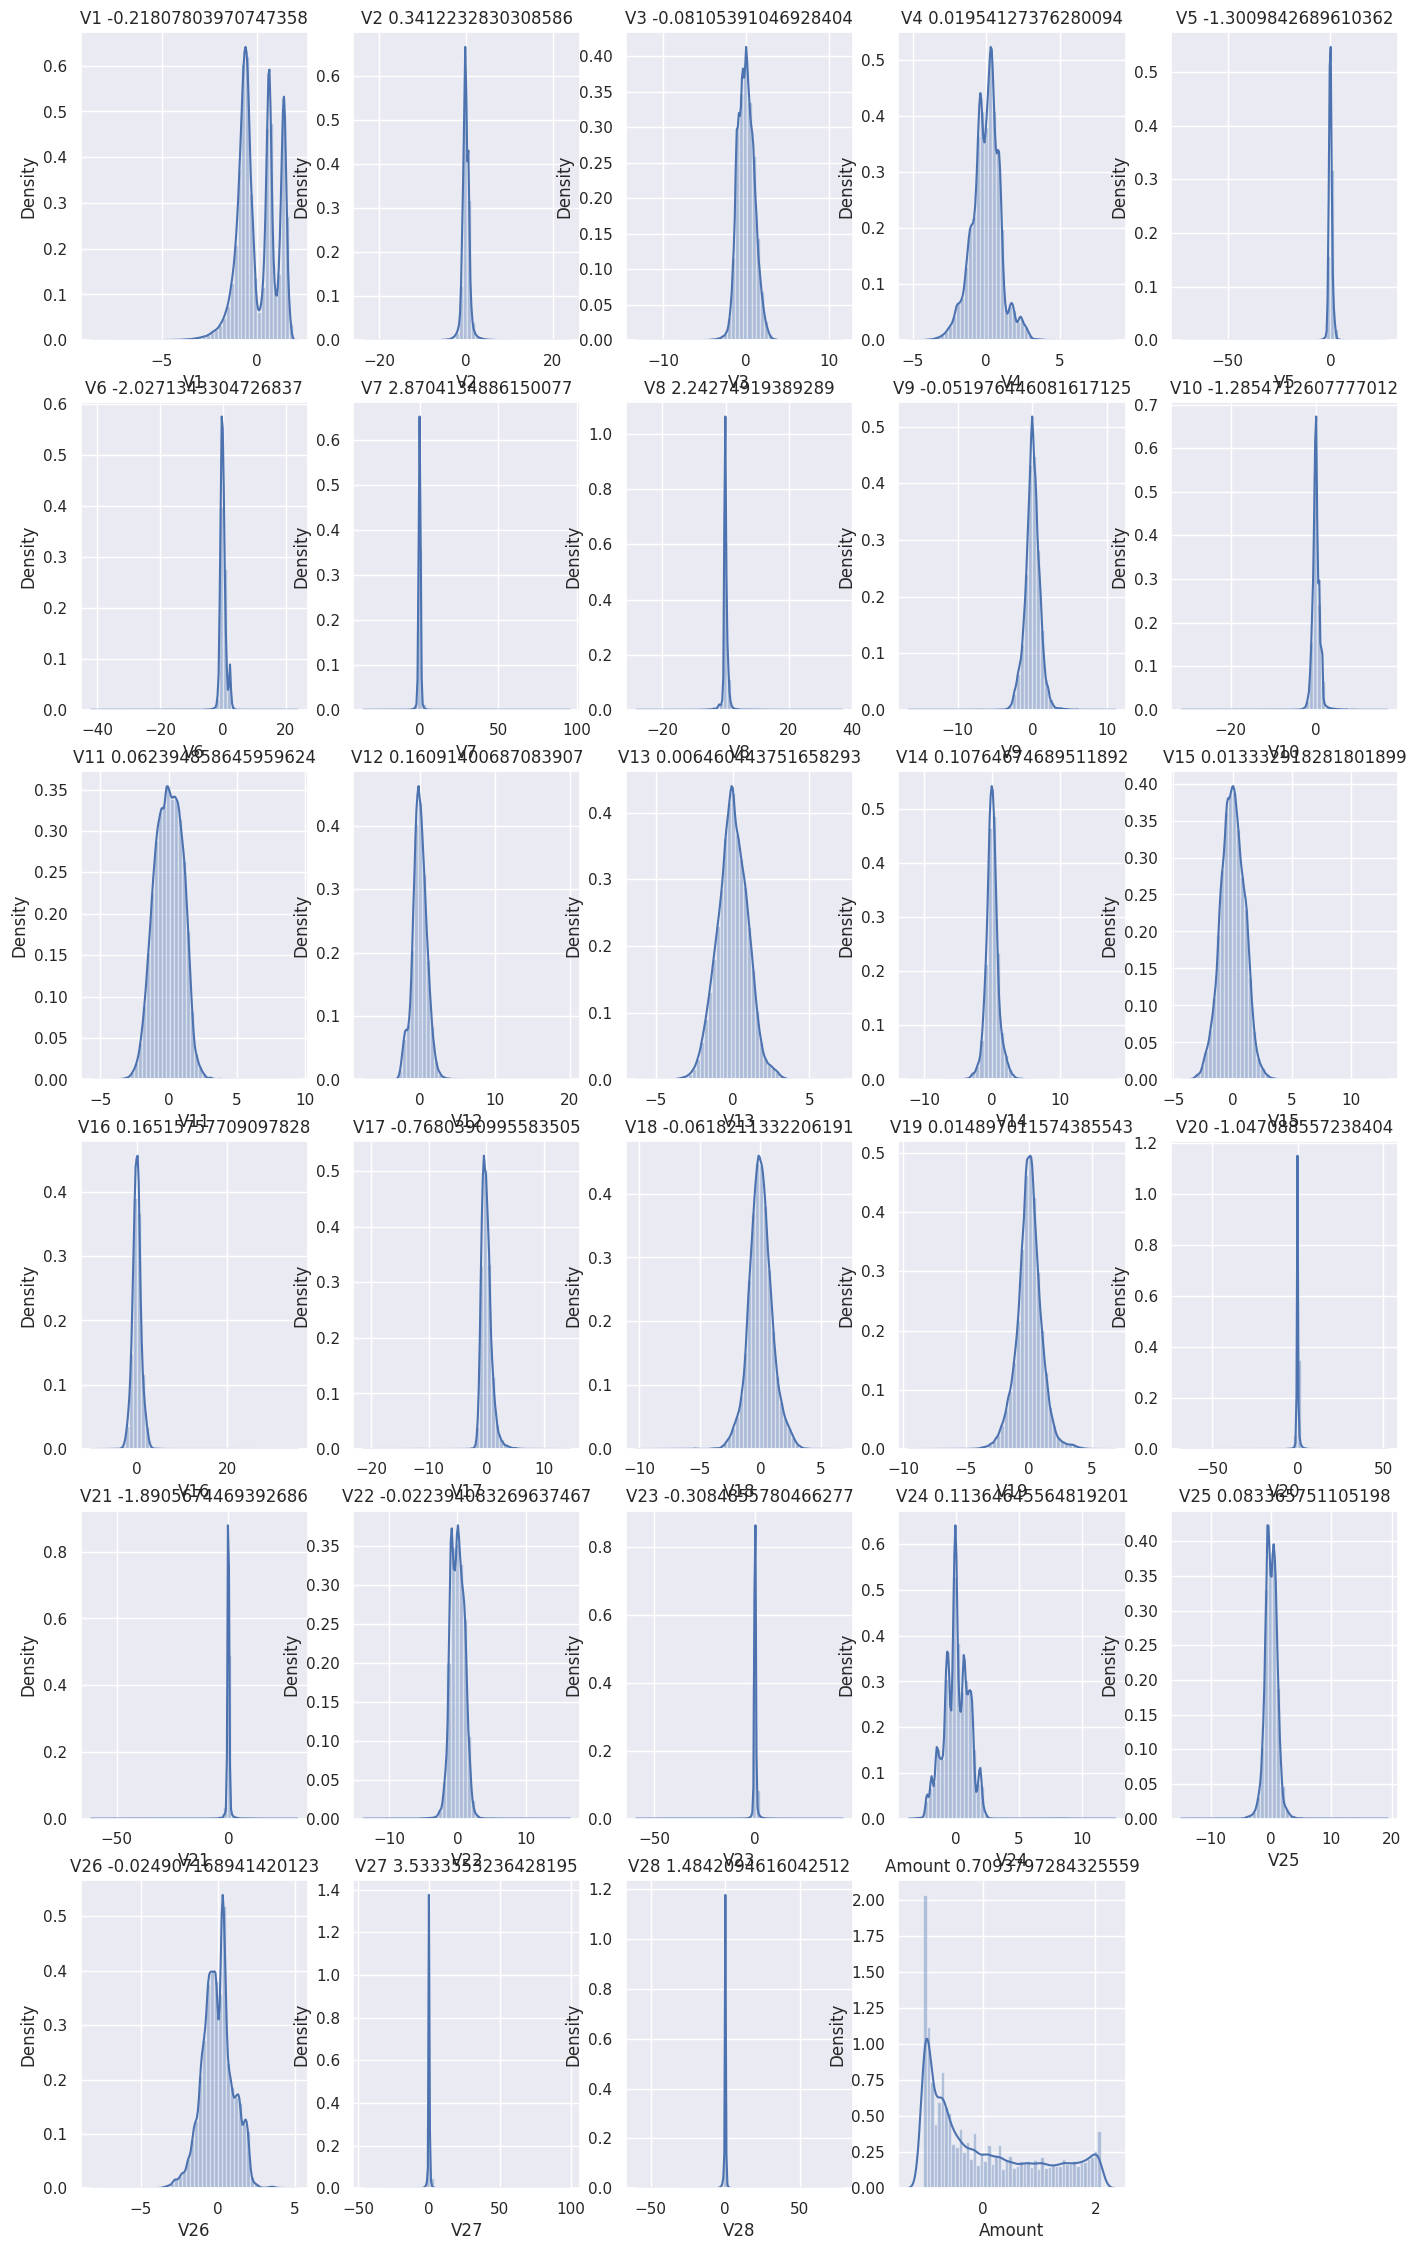

In [29]:
# Determine the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

# Transform the test set
X_test[cols] = pt.transform(X_test)

# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))

for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

***Now note that immediately after the transformation, all the variables have a normal distribution***

#Logistic Regression#

Train Accuracy: 0.9148665819567979
Test Accuracy: 0.9137055837563451
Train Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       393
           1       0.93      0.89      0.91       394

    accuracy                           0.91       787
   macro avg       0.92      0.91      0.91       787
weighted avg       0.92      0.91      0.91       787

Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.85      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



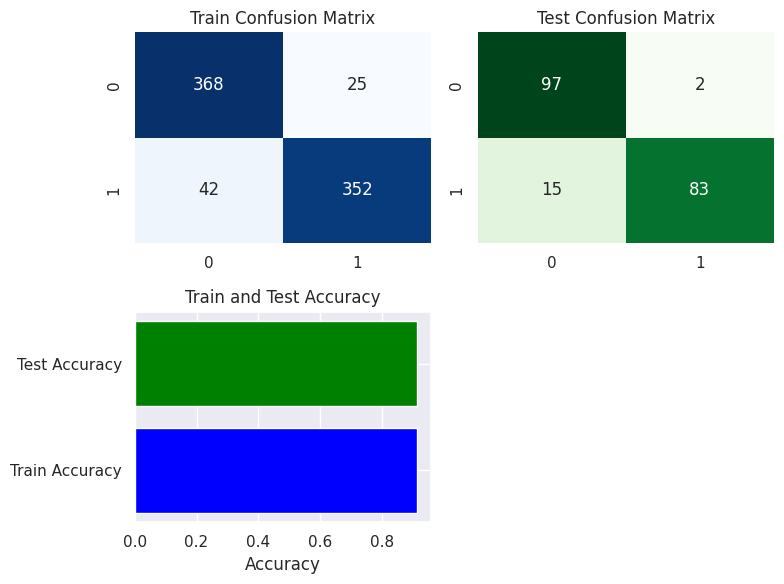

In [33]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate legitimate and fraudulent transactions by assigning classes
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

# Undersample legitimate transactions to balance the classes
legit_sample = legit.sample(n=len(fraud), random_state=2)
data = pd.concat([legit_sample, fraud], axis=0)

# Split data into training and testing datasets
X = data.drop(columns="Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Training logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model performance nad predecting the results
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(train_pred, y_train)
test_acc = accuracy_score(test_pred, y_test)

# Print the necessary plots and the accuracy
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 3)
plt.barh(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=['blue', 'green'])
plt.xlabel("Accuracy")
plt.title("Train and Test Accuracy")

# Get the Confusion matrix for traiming and testing
conf_matrix_train = confusion_matrix(y_train, train_pred)
conf_matrix_test = confusion_matrix(y_test, test_pred)

# Classification report for the model
class_report_train = classification_report(y_train, train_pred)
class_report_test = classification_report(y_test, test_pred)

#Print the necessary plots and the accuracy
print("Train Classification Report:\n", class_report_train)
print("Test Classification Report:\n", class_report_test)

plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Train Confusion Matrix")
plt.subplot(2, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

#Random Forest#

Train Accuracy: 1.0
Test Accuracy: 0.9995435553526912
Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199032
           1       1.00      1.00      1.00       332

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.96      0.79      0.87       160

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix (Train):
[[199032      0]
 [     0    332]]
Confusion Matrix (Test):
[[85278     5]
 [   34   126]]


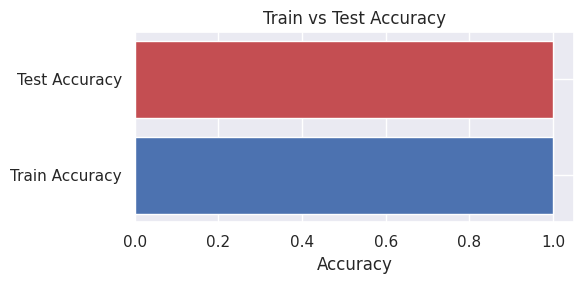

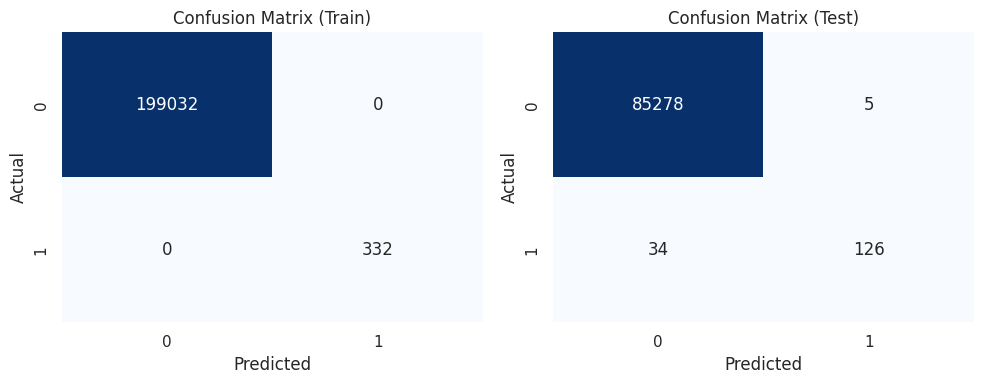

In [31]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Train with the random forest classifier
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)

# Make predictions to get the results
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate and print the necessary plots and get accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print classification report for the model
print("Classification Report (Train):")
print(classification_report(y_train, y_pred_train))

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Print confusion matrix and get the necessary plots
print("Confusion Matrix (Train):")
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print(conf_matrix_train)

print("Confusion Matrix (Test):")
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(conf_matrix_test)

# Create arrays for train and test accuracies with matching labels
accuracy_labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

# Plot horizontal bar plot for train and test accuracies
plt.figure(figsize=(6, 3))
plt.barh(accuracy_labels, accuracies, color=['b', 'r'])
plt.title('Train vs Test Accuracy')
plt.xlabel('Accuracy')

plt.tight_layout()
plt.show()

# Plot confusion matrices using heatmaps to visualise the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
